<a href="https://colab.research.google.com/github/omkar123katare/Capstone_3_Health_insurance_cross_sell_prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [1]:

#@title

# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
health_insurance_CS=pd.read_csv('/content/drive/MyDrive/Data Science Projects-AlmaBetter/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [4]:
health_CS=health_insurance_CS.copy()

In [5]:
health_CS.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
health_CS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
health_CS.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
health_CS.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [12]:
for i in health_CS.columns:
    print(f'Number of unique elements in {i} column --> {health_CS[i].nunique()}')

Number of unique elements in id column --> 381109
Number of unique elements in Gender column --> 2
Number of unique elements in Age column --> 66
Number of unique elements in Driving_License column --> 2
Number of unique elements in Region_Code column --> 53
Number of unique elements in Previously_Insured column --> 2
Number of unique elements in Vehicle_Age column --> 3
Number of unique elements in Vehicle_Damage column --> 2
Number of unique elements in Annual_Premium column --> 48838
Number of unique elements in Policy_Sales_Channel column --> 155
Number of unique elements in Vintage column --> 290
Number of unique elements in Response column --> 2


Text(0.5, 0.98, 'Age Column distplot')

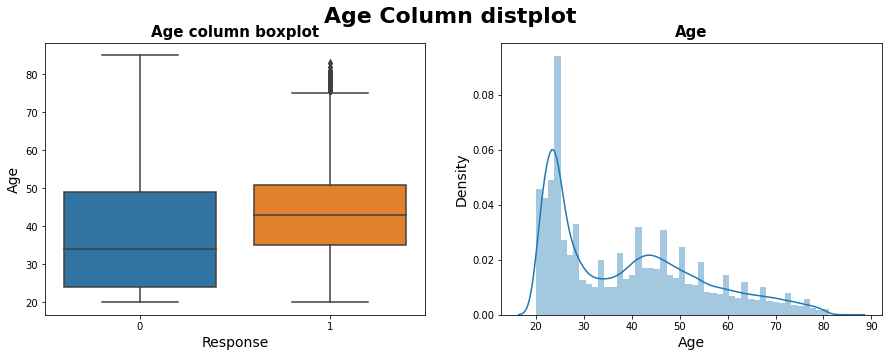

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(ax = axes[0],y = 'Age',x = 'Response', data = health_CS)
axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
axes[0].set_ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
axes[0].set_title('Age column boxplot', fontdict={'fontsize': 15,  'fontweight' :'bold'})




sns.distplot(ax = axes[1],x = health_CS['Age'])
axes[1].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
axes[1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})



plt.suptitle('Age Column', fontsize = 22, fontweight = 'bold' )

Text(0.5, 0.98, 'Annual_Premium Column')

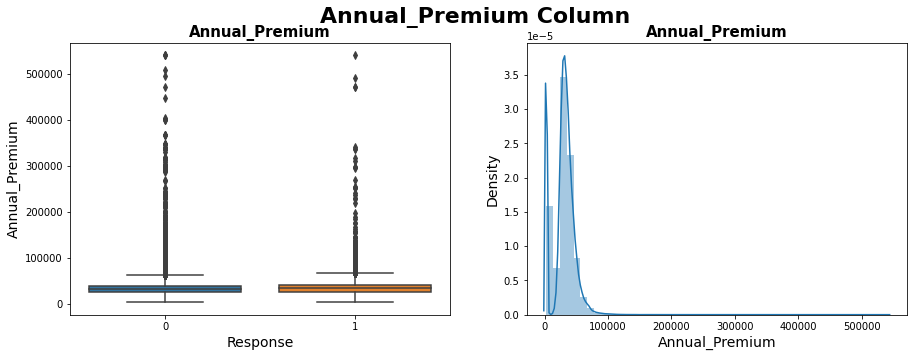

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(ax = axes[0],y = 'Annual_Premium',x = 'Response', data = health_CS)
axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
axes[0].set_ylabel(ylabel = 'Annual_Premium', fontdict={'fontsize': 14})
axes[0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})




sns.distplot(ax = axes[1],x = health_CS['Annual_Premium'])
axes[1].set_xlabel(xlabel = 'Annual_Premium', fontdict={'fontsize': 14})
axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
axes[1].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})



plt.suptitle('Annual_Premium Column', fontsize = 22, fontweight = 'bold' )

Text(0.5, 0.98, 'Vintage Column')

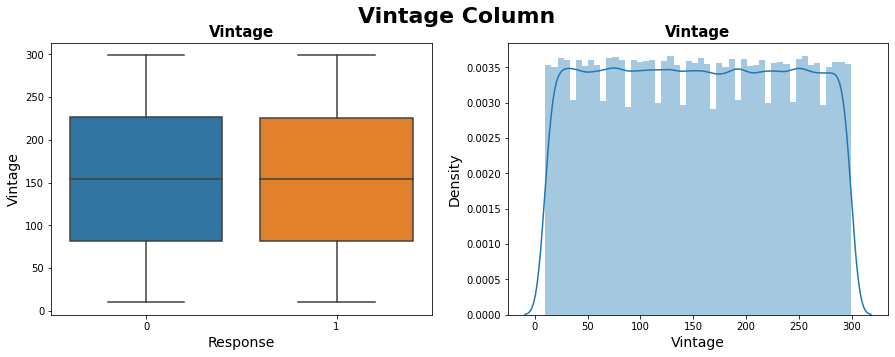

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(ax = axes[0],y = 'Vintage',x = 'Response', data = health_CS)
axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
axes[0].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
axes[0].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})




sns.distplot(ax = axes[1],x = health_CS['Vintage'])
axes[1].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
axes[1].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})



plt.suptitle('Vintage Column', fontsize = 22, fontweight = 'bold' )

Text(0.5, 0.98, 'Policy_Sales_Channel Column')

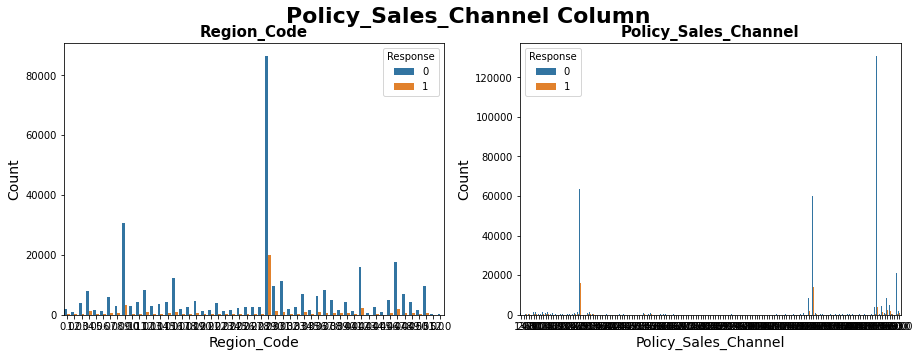

In [20]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(ax = axes[0],x = 'Region_Code', data = health_CS, hue='Response')
axes[0].set_xlabel(xlabel = 'Region_Code', fontdict={'fontsize': 14})
axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
axes[0].set_title('Region_Code', fontdict={'fontsize': 15,  'fontweight' :'bold'})

sns.countplot(ax = axes[1],x = 'Policy_Sales_Channel', data = health_CS, hue='Response')
axes[1].set_xlabel(xlabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
axes[1].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15,  'fontweight' :'bold'})

plt.suptitle('Policy_Sales_Channel Column', fontsize = 22, fontweight = 'bold' )

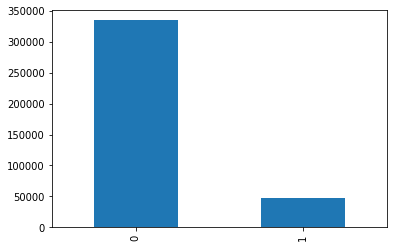

In [24]:
health_CS['Response'].value_counts().plot(kind='bar')

This is a highly imbalanced dataset

Text(0.5, 1.0, 'Policy Sales Channel Distribution')

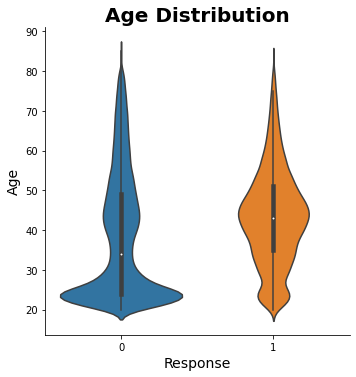

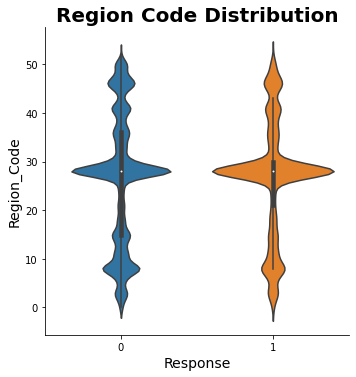

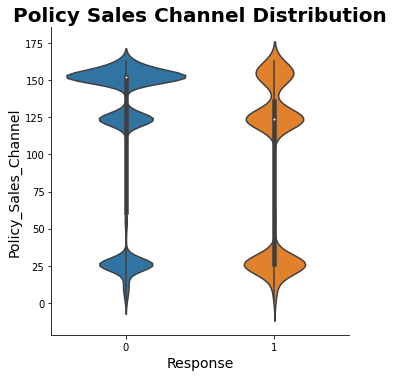

In [25]:
sns.catplot(y = 'Age', data = health_CS, x='Response', kind = 'violin')
plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
plt.title('Age Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

sns.catplot(y = 'Region_Code', data = health_CS, x='Response', kind = 'violin')
plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Region_Code', fontdict={'fontsize': 14})
plt.title('Region Code Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

sns.catplot(y = 'Policy_Sales_Channel', data = health_CS, x='Response', kind = 'violin')
plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
plt.title('Policy Sales Channel Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

**From the above graphical representation we can conclude on a few points:**

1. As we can see, we have a huge dispersion of data in Age feature, so in order to gain better insights on Age feature, we can convert it into categories as YoungAge, MiddleAge and OldAge.
2. Similarly, we can also categorize Region Code and Policy_Sales_Channel.